In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_train.csv", header=0)
#import os
#dataset = pd.read_csv(os.getcwd()+"/Telco-Customer-Churn.csv", header=0)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 38 columns):
MachineID                      674 non-null object
MachineModel                   674 non-null object
ServicePeriod                  674 non-null int64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null object
MostOccuredError               674 non-null object
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
comp_4_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null object
MostReplacedComp  

In [4]:
dataset.head()

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
0,MID11001,model4,21,60.00,35.65,40.71,0.0,65.00,13.58,error2,...,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33,ComponentRepair
1,MID11002,model1,21,0.00,150.00,150.00,95.0,95.00,31.50,error5,...,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49,ComponentRepair
2,MID11003,model3,22,37.50,90.00,93.54,0.0,85.00,27.27,error3,...,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54,NoIssue
3,MID11004,model4,22,42.41,78.75,78.75,0.0,52.50,18.53,error2,...,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59,NoIssue
4,MID11005,model3,22,44.21,96.44,33.24,0.0,56.25,19.02,error2,...,66.24,110.95,242.30,64.10,22.16,170.82,446.06,100.76,40.57,ComponentRepair


In [5]:
dataset.tail(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
669,MID11845,model2,5,18.78,60.00,60.0,82.50,0.0,23.57,error4,...,64.44,116.03,226.84,63.30,22.10,170.90,447.85,101.06,40.20,NoIssue
670,MID11846,model3,4,44.88,45.00,45.0,23.71,0.0,15.50,error1,...,66.57,109.56,159.59,64.30,17.12,170.66,447.11,100.68,40.26,ComponentRepair
671,MID11847,model2,3,72.49,26.21,40.0,55.00,0.0,15.29,error2,...,66.77,119.70,223.41,58.28,23.15,170.72,446.87,101.42,40.26,ComponentReplacement
672,MID11848,model4,4,70.00,0.00,7.6,17.19,0.0,31.69,error1,...,62.87,117.16,160.57,62.36,20.97,170.80,447.65,100.49,40.26,ComponentRepair
673,MID11850,model3,3,39.10,54.00,54.0,0.00,0.0,21.39,error1,...,61.84,114.43,224.84,61.71,20.54,170.67,444.25,100.78,40.15,ComponentRepair


In [6]:
dataset.describe()

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,13.091988,44.113991,47.677389,46.326365,19.600445,25.634139,26.116884,37.440282,44.943234,18.009629,...,155.885697,64.889674,113.157478,217.153442,62.113843,21.118279,170.758917,446.624199,100.842478,40.365356
std,5.288455,34.573864,31.041506,31.879803,30.278308,33.797062,9.207301,39.119877,36.152294,31.166810,...,7.704799,2.921304,4.886335,26.071793,3.058292,1.519342,0.229260,0.889770,0.283153,0.125382
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,144.120000,58.490000,87.780000,102.170000,50.540000,14.640000,170.140000,443.760000,100.240000,40.090000
25%,9.000000,5.225000,29.580000,23.907500,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,150.752500,62.962500,110.627500,205.285000,60.420000,20.342500,170.610000,446.010000,100.650000,40.270000
50%,13.000000,45.000000,48.825000,48.000000,0.000000,0.000000,24.230000,35.000000,48.375000,0.000000,...,153.925000,64.290000,113.830000,221.575000,62.510000,21.265000,170.760000,446.605000,100.770000,40.340000
75%,18.000000,65.732500,67.500000,67.097500,45.000000,57.000000,30.000000,69.375000,67.500000,45.000000,...,158.175000,66.025000,116.487500,235.415000,64.380000,22.147500,170.900000,447.260000,100.990000,40.460000
max,22.000000,147.380000,157.500000,157.500000,135.000000,135.000000,95.390000,142.500000,162.060000,135.000000,...,195.270000,79.110000,123.610000,269.030000,67.840000,24.290000,171.530000,449.480000,101.660000,40.680000


In [7]:
dataset.drop(labels='MachineID', axis=1, inplace=True)

In [8]:
dataset.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
comp_4_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_mi

In [9]:
#dataset.dropna(inplace=True)
#print(dataset.isnull().sum(axis=0))

In [10]:
columns = dataset.columns
cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']
#num_attr = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_attr = list(set(columns) - set(cat_attr))

In [11]:
print("The total columns in the dataset are {}".format(len(columns)))
print("The numerical columns in the dataset are {}".format(len(num_attr)))
print("The categorical columns in the dataset are {}".format(len(cat_attr)))

The total columns in the dataset are 37
The numerical columns in the dataset are 29
The categorical columns in the dataset are 8


In [12]:
dataset[num_attr] = dataset[num_attr].apply(lambda x: x.astype('float64'))

In [13]:
dataset[cat_attr] = dataset[cat_attr].apply(lambda x: x.astype('category'))
#dataset['ActionPoint'] = pd.Categorical(dataset['ActionPoint'])

In [14]:
dataset.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
comp_4_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64


In [15]:
dataset.shape

(674, 37)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 37 columns):
MachineModel                   674 non-null category
ServicePeriod                  674 non-null float64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null category
MostOccuredError               674 non-null category
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
comp_4_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null category
MostReplacedComp               674 non-null category
comp1_

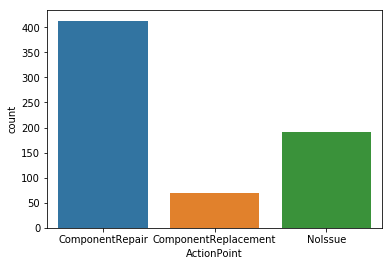

In [17]:
sns.countplot(x='ActionPoint', data=dataset)
#plt.savefig('class_prop.png')
plt.show()

In [18]:
lab_enc = LabelEncoder()
lab_enc.fit(dataset['ActionPoint'])
dataset['ActionPoint'] = lab_enc.transform(dataset['ActionPoint'])

In [19]:
dataset['ActionPoint'].value_counts()

0    413
2    191
1     70
Name: ActionPoint, dtype: int64

In [20]:
labels = dataset['ActionPoint']
print(len(labels))
dataset.drop(labels='ActionPoint', axis=1, inplace=True)

674


In [21]:
print(list(set(cat_attr)-set(['ActionPoint'])))
print(cat_attr)
##dataset_dumm = pd.get_dummies(data=dataset, columns=cat_attr)

['MostReplacedComp', 'RecentRepaired', 'MostOccuredError', 'RecentError', 'MostRepairedComponent', 'RecentReplacedComp', 'MachineModel']
['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']


In [22]:
dataset_dumm = pd.get_dummies(data=dataset, columns=list(set(cat_attr)-set(['ActionPoint'])))

In [23]:
dataset_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg', 'comp_4_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MostReplacedComp_Component1', 'MostReplacedComp_Component2',
       'MostReplacedComp_Component3', 'MostReplacedComp_Component4',
       'RecentRepaired_Component1', 'RecentRepaired_Component2',
       'RecentRepaired_Component3', 'RecentRepaired_Component4',
       'MostOccuredError_error1', 'MostOccuredError_error2',
       'MostOccuredError_error3', 'MostOccuredError_error4',
       'MostOccuredError

In [24]:
dataset_dumm.head(6)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MostRepairedComponent_Component3,MostRepairedComponent_Component4,RecentReplacedComp_Component1,RecentReplacedComp_Component2,RecentReplacedComp_Component3,RecentReplacedComp_Component4,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4
0,21.0,60.00,35.65,40.71,0.0,65.00,13.58,60.0,47.5,0.0,...,0,0,0,0,0,1,0,0,0,1
1,21.0,0.00,150.00,150.00,95.0,95.00,31.50,0.0,150.0,95.0,...,1,0,0,0,1,0,1,0,0,0
2,22.0,37.50,90.00,93.54,0.0,85.00,27.27,37.5,135.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,22.0,42.41,78.75,78.75,0.0,52.50,18.53,0.0,105.0,0.0,...,1,0,0,1,0,0,0,0,0,1
4,22.0,44.21,96.44,33.24,0.0,56.25,19.02,45.0,30.0,0.0,...,0,1,0,0,0,1,0,0,1,0
5,21.0,41.25,19.81,7.57,98.9,40.00,14.13,82.5,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0


### Gradient Boosting

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset_dumm, labels, test_size=0.4, stratify=labels, random_state=0)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
#Setting up pipeline
steps = [('scaler', StandardScaler()),
         ('SGBT', GradientBoostingClassifier())]
pipeline = Pipeline(steps)

In [61]:
#Setting params grid for hyper param tuning
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)
param_grid = {'SGBT__max_depth': [3,5, 6,7,8], 'SGBT__subsample': [0.8, 0.7, 0.6,], 'SGBT__max_features':[0.2, 0.3], 
              'SGBT__n_estimators': [10, 20, 30]}
sgbt_cv = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold)

In [62]:
sgbt_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGBT', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrea...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SGBT__max_depth': [3, 5, 6, 7, 8], 'SGBT__subsample': [0.8, 0.7, 0.6], 'SGBT__max_features': [0.2, 0.3], 'SGBT__n_estimators': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
sgbt_cv_best = sgbt_cv.best_estimator_
y_pred = sgbt_cv_best.predict(X_test)

In [64]:
print("Accuracy: {}".format(sgbt_cv_best.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Best Parameters: {}".format(sgbt_cv.best_params_))
print("Tuned Model Best Score: {}".format(sgbt_cv.best_score_))

Accuracy: 0.6555555555555556
             precision    recall  f1-score   support

          0       0.66      0.92      0.77       165
          1       0.67      0.07      0.13        28
          2       0.62      0.31      0.41        77

avg / total       0.65      0.66      0.60       270

Tuned Model Best Parameters: {'SGBT__max_depth': 3, 'SGBT__max_features': 0.3, 'SGBT__n_estimators': 30, 'SGBT__subsample': 0.6}
Tuned Model Best Score: 0.655940594059406


#### Ada boost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=500, learning_rate=0.3, algorithm= 'SAMME', random_state=143)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.3, n_estimators=500, random_state=143)

In [110]:
y_pred_ada = ada_clf.predict(X_test)
print(classification_report(y_test,y_pred_ada))

             precision    recall  f1-score   support

          0       0.71      0.81      0.76       165
          1       0.40      0.29      0.33        28
          2       0.62      0.49      0.55        77

avg / total       0.65      0.67      0.65       270



### Predicting on test data and writing results back to csv

In [113]:
test = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_test.csv", header=0)

In [114]:
test.head(6)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
0,MID11006,model3,21,45.00,20.0,20.0,0.0,50.00,19.00,error1,...,156.43,65.47,113.24,198.63,61.67,21.63,170.78,446.93,100.87,40.55
1,MID11007,model2,21,30.00,25.9,0.0,60.0,40.00,17.14,error5,...,158.08,64.81,117.10,235.26,57.40,21.46,170.26,446.78,101.52,40.64
2,MID11039,model3,22,45.00,60.0,60.0,0.0,75.00,23.08,error1,...,152.31,69.27,118.99,217.51,64.54,21.08,170.94,446.35,100.87,40.57
3,MID11045,model4,21,30.00,25.0,25.0,0.0,62.26,16.98,error5,...,163.95,64.18,115.16,218.24,55.81,20.89,171.17,447.03,100.84,40.36
4,MID11049,model4,21,0.00,0.0,0.0,38.6,67.50,33.75,error5,...,146.07,64.56,102.39,205.97,66.63,21.34,170.73,446.50,100.61,40.52
5,MID11052,model3,21,84.43,100.0,100.0,0.0,75.00,22.50,error3,...,147.56,66.28,117.62,234.11,64.21,20.84,170.56,445.97,100.63,40.40


In [115]:
test_machineID = test.MachineID.tolist()
test.drop(labels='MachineID', axis=1, inplace=True)

In [116]:
test_machineID[5]

'MID11052'

In [117]:
test.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
comp_4_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_mi

In [118]:
test.dtypes

MachineModel                    object
ServicePeriod                    int64
error1_avg                     float64
error2_avg                     float64
error3_avg                     float64
error4_avg                     float64
error5_avg                     float64
Comp_Timelapse_diff_errors     float64
RecentError                     object
MostOccuredError                object
comp_1_replace_avg             float64
comp_2_replace_avg             float64
comp_3_replace_avg             float64
comp_4_replace_avg             float64
Comp_Timelapse_diff_replace    float64
RecentReplacedComp              object
MostReplacedComp                object
comp1_repair_avg               float64
comp2_repair_avg               float64
comp3_repair_avg               float64
comp4_repair_avg               float64
Comp_Timelapse_diff_repair     float64
RecentRepaired                  object
MostRepairedComponent           object
Sensor1_max                    float64
Sensor2_max              

In [119]:
test_columns = dataset.columns
test_cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent']
#num_attr = ['tenure', 'MonthlyCharges', 'TotalCharges']
test_num_attr = list(set(test_columns) - set(test_cat_attr))

In [120]:
print("The total columns in the dataset are {}".format(len(test_columns)))
print("The numerical columns in the dataset are {}".format(len(test_num_attr)))
print("The categorical columns in the dataset are {}".format(len(test_cat_attr)))

The total columns in the dataset are 36
The numerical columns in the dataset are 29
The categorical columns in the dataset are 7


In [121]:
test[test_num_attr] = dataset[test_num_attr].apply(lambda x: x.astype('float64'))

In [122]:
test[test_cat_attr] = dataset[test_cat_attr].apply(lambda x: x.astype('category'))

In [123]:
test.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
comp_4_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64


In [124]:
test_dumm = pd.get_dummies(data=test, columns=test_cat_attr)

In [125]:
test_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg', 'comp_4_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MachineModel_model1', 'MachineModel_model2', 'MachineModel_model3',
       'MachineModel_model4', 'RecentError_error1', 'RecentError_error2',
       'RecentError_error3', 'RecentError_error4', 'RecentError_error5',
       'MostOccuredError_error1', 'MostOccuredError_error2',
       'MostOccuredError_error3', 'MostOccuredError_error4',
       'MostOccuredError_error5', 'RecentReplacedComp_Component1',
  

In [127]:
test_ada_preds = ada_clf.predict(test_dumm)

In [128]:
print(test_ada_preds.shape)
print(test_dumm.shape)

(326,)
(326, 59)


In [139]:
result_preds = lab_enc.inverse_transform(test_ada_preds)
print(result_preds[:4])
print(np.unique(result_preds))

['ComponentRepair' 'ComponentRepair' 'ComponentRepair' 'NoIssue']
['ComponentRepair' 'ComponentReplacement' 'NoIssue']


In [130]:
print("Length of test machine ID {}".format(len(test_machineID)))
print("Length of test pred classes {}".format(len(result_preds)))

Length of test machine ID 326
Length of test pred classes 326


In [131]:
test_dict = {'MachineID':test_machineID, 'ActionPoint': result_preds}
test_df = pd.DataFrame(test_dict)

In [132]:
test_df.head(5)

,MachineID,ActionPoint
0,MID11006,ComponentRepair
1,MID11007,ComponentRepair
2,MID11039,ComponentRepair
3,MID11045,NoIssue
4,MID11049,ComponentRepair


In [138]:
test_df.ActionPoint.value_counts()

ComponentRepair         223
NoIssue                  60
ComponentReplacement     43
Name: ActionPoint, dtype: int64

In [133]:
test_df.to_csv('../submissions/adaboost.csv', index=False)